# Preparations

In [1]:
# Env
from Env4_Two_Step_Task import *
from Agent import *

/Users/Marvin/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Save Paths
from datetime import datetime
path = "../Log/train_env4/" + datetime.now().strftime("%m%d-%H:%M:%S") + "_gamma0.75_lr0.1"

In [3]:
# Hyperparameters
gamma = 0.75
learning_rate = 7e-4
beta_v = 0.05
beta_e = 0.05

# train
nb_trials = 100
nb_episodes = 20000

In [4]:
env = Two_Step_Task()

# Agent
agent = Agent(learning_rate, gamma, beta_v, beta_e,  #loss func
                 env, nb_trials, nb_episodes,  #train
                 path)

2023-01-10 18:32:57.324453: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Training

In [5]:
agent.train()

In [6]:
# agent.model.save(path+'/model.h5')

# Testing

In [8]:
#test_model = keras.models.load_model('Log/train_Two_Step_Task/0105-21:52:39/model.h5')
test_model = agent.model
test_episode = 300

In [11]:
agent.test(test_model, test_episode, agent.nb_trials)

# Analysis

[[[1047296.   81168.]
  [  90531.   28936.]]

 [[ 355394.  123873.]
  [ 258756.   23746.]]]


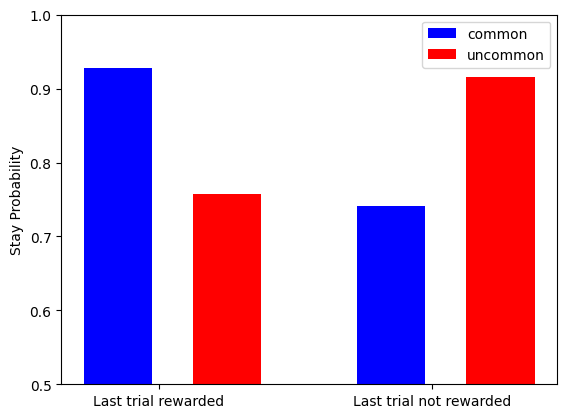

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = np.arange(2)
ax.set_ylim([0.0, 1.0])
ax.set_ylabel('Stay Probability')

stay_probs = agent.env.stayProb()

common = [stay_probs[0,0,0],stay_probs[1,0,0]]
uncommon = [stay_probs[0,1,0],stay_probs[1,1,0]]

ax.set_xticks([1.3,3.3])
ax.set_xticklabels(['Last trial rewarded', 'Last trial not rewarded'])

c = plt.bar([1,3],  common, color='b', width=0.5)
uc = plt.bar([1.8,3.8], uncommon, color='r', width=0.5)
plt.ylim(0.5,1)
ax.legend( (c[0], uc[0]), ('common', 'uncommon') )
